In [1]:
import numpy as np
import pandas as pd

In [2]:
a= pd.read_csv('HapPinessAlcoholConsumption.csv')

In [3]:
a

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


In [4]:
a.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [5]:
b = a[['Wine_PerCapita','HappinessScore']]
b.head()

,Wine_PerCapita,HappinessScore
0,278,7.526
1,280,7.509
2,78,7.501
3,129,7.498
4,97,7.413


In [6]:
matrix = np.array(b.values,'float')
matrix[0:5,:]

array([[278.   ,   7.526],
       [280.   ,   7.509],
       [ 78.   ,   7.501],
       [129.   ,   7.498],
       [ 97.   ,   7.413]])

In [7]:
#Assign input and target variable
X = matrix[:,0]
y = matrix[:,1]

In [8]:
#feature normalization
# input variable divided by maximum value among input values in X
X = X/(np.max(X)) 

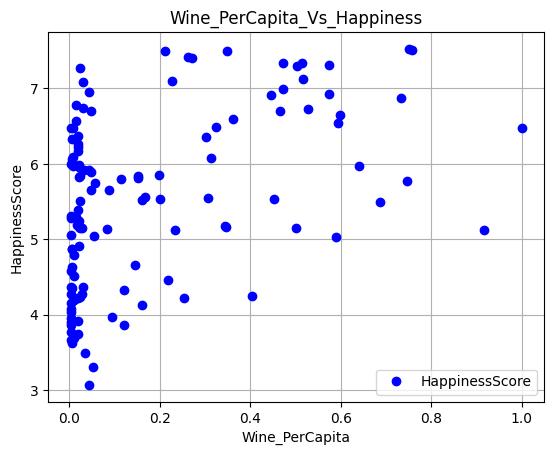

In [9]:
import matplotlib.pyplot as plt
plt.plot(X,y,'bo')
plt.ylabel('HappinessScore')
plt.xlabel('Wine_PerCapita')
plt.legend(['HappinessScore'])
plt.title('Wine_PerCapita_Vs_Happiness')
plt.grid()
plt.show()

In [10]:
def computecost(x,y,theta):
    
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

In [11]:
#initialising parameter
m = np.size(y)
X = X.reshape([122,1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])
print(theta,'\n',m)
[[0.]
 ,[0.]] 
122
print(computecost(x,y,theta))

[[0.]
 [0.]] 
 122
1941.7825705000002


In [12]:
   def gradient(x, y, theta):
    alpha = 0.00001
    iteration = 2000
    J_history = np.zeros([iteration, 1])
    
    for iter in range(0, 2000):
        error = (x @ theta) - y
        temp0 = theta[0] - ((alpha/m) * np.sum(error * x[:, 0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error * x[:, 1]))
        theta = np.array([temp0, temp1]).reshape(2, 1)
        J_history[iter] = (1 / (2*m)) * (np.sum(((x @ theta) - y)**2))
    
    return theta, J_history
    theta , J = gradient(x,y,theta)
print(theta)

[[0.]
 [0.]]


In [13]:
theta , J = gradient(x,y,theta)
print(J)

[[1937.07711475]
 [1932.38354039]
 [1927.70181749]
 ...
 [  95.65287807]
 [  95.62560932]
 [  95.59841541]]


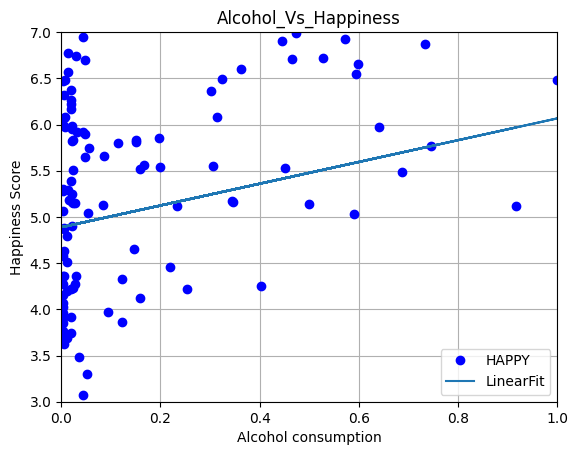

In [14]:
#plot linear fit for our theta
plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.axis([0,1,3,7])
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['HAPPY','LinearFit'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()

In [15]:
predict1 = [1,(164/np.max(matrix[:,0]))] @ theta #normalising the input value, 1 is for intercept term so not need to normalise
print(predict1)

[5.41033995]
